In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')

DataFrame df stores our customer churn data

In [43]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Now, we are able to notice that the type of Total Charges field is showing to be and object but it is a numeric field. So we'll have to change its datatype to numeric.

In [45]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


As we can see we have 11 Null values for total charges feature so we'll drop them.

In [48]:
df = df.dropna()

In [49]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


To know how many customers have churned and how many have not churned-->

In [50]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


By the following graph,**we get the information that the shorter the contract the high the churn rate is**.


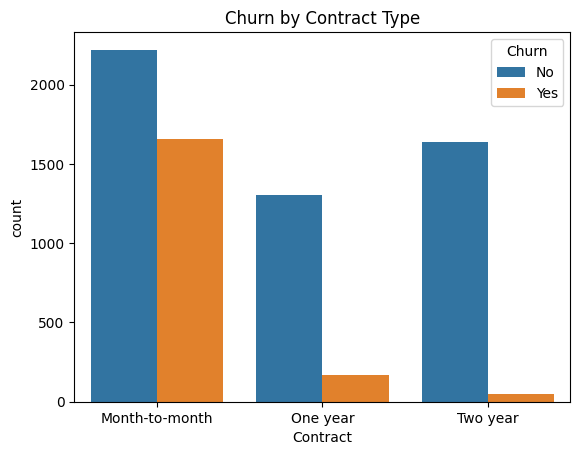

In [51]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()

By the following graph, **we get the information that the customers that have Fiber Optic as Internet service would likely to churn**.

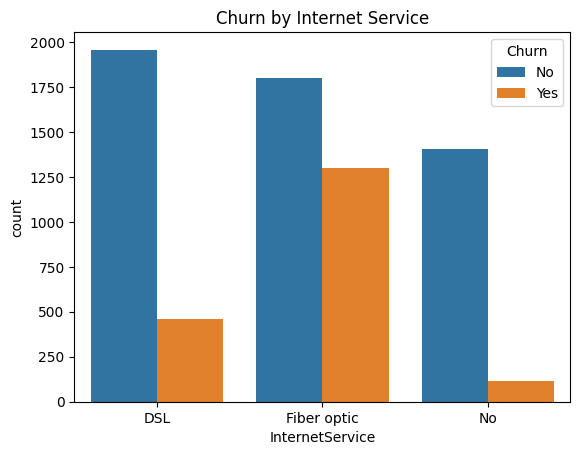

In [52]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.show()

The following information suggests that **the customers that don't have any Tech-Support are likely to churn more.**

In [53]:
pd.crosstab(df['TechSupport'], df['Churn'], margins=True)

Churn,No,Yes,All
TechSupport,,,
No,2026,1446,3472
No internet service,1407,113,1520
Yes,1730,310,2040
All,5163,1869,7032


Tenure vs churn Boxplot->

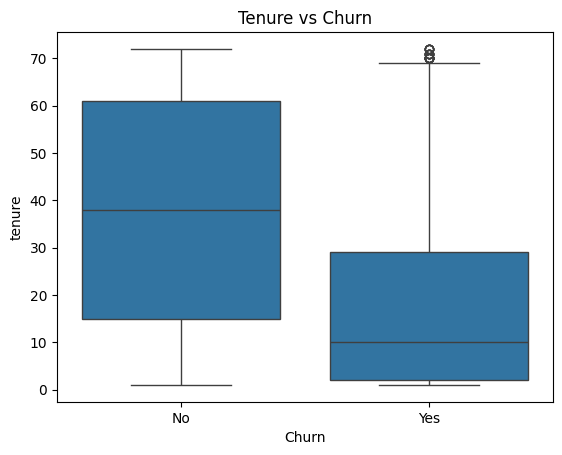

In [54]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

Insights from Tenure vs Churn box plot:
**Customers with shorter tenure are significantly more likely to churn. Long-tenure customers show greater loyalty, indicating tenure is a strong negative predictor of churn.**

Monthly charges vs Churn Box Plot->

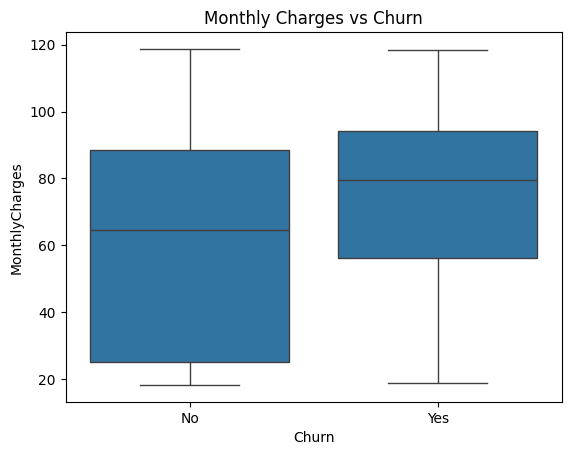

In [55]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

Insights from Monthly charges bs Churn Box plot->
**Customers paying higher monthly charges are more likely to churn, suggesting price sensitivity plays a role in customer attrition.**

HeatMap Analysis:
**Tenure shows the strongest negative correlation with churn, indicating longer-tenure customers are less likely to churn. Monthly charges show a positive correlation, suggesting higher costs slightly increase churn risk.**

In [56]:
df[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [57]:
pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100

Churn,No,Yes
TechSupport,,
No,58.352535,41.647465
No internet service,92.565789,7.434211
Yes,84.803922,15.196078


In [58]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df = df.drop(['customerID'],axis=1)

In [60]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [61]:
df['Churn_binary'] = df['Churn'].map({'Yes':1, 'No':0})

In [62]:
df = df.drop(columns=['Churn'])

In [63]:
X = df.drop(columns=['Churn_binary'])
y = df['Churn_binary']

In [64]:
df.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_binary
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [67]:
x_train.shape,x_test.shape,y_test.shape,y_train.shape

((5274, 19), (1758, 19), (1758,), (5274,))

In [68]:
x_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
1093,Female,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Electronic check,100.45,7159.70
5815,Male,1,No,No,9,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.05,746.50
1736,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.50,19.50
40,Male,0,Yes,Yes,10,Yes,No,DSL,No,Yes,No,No,No,No,One year,No,Mailed check,49.55,475.70
4008,Female,0,Yes,Yes,51,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,56.15,2898.95


In [69]:
num_var= x_train.select_dtypes(include=['int64','Float64']).columns
cat_var = x_train.select_dtypes(include=['O']).columns
num_var,cat_var

(Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'),
 Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
        'PaperlessBilling', 'PaymentMethod'],
       dtype='object'))

In [70]:
for i in cat_var:
  print(x_train.value_counts(i))

gender
Male      2668
Female    2606
Name: count, dtype: int64
Partner
No     2687
Yes    2587
Name: count, dtype: int64
Dependents
No     3654
Yes    1620
Name: count, dtype: int64
PhoneService
Yes    4769
No      505
Name: count, dtype: int64
MultipleLines
No                  2572
Yes                 2197
No phone service     505
Name: count, dtype: int64
InternetService
Fiber optic    2295
DSL            1830
No             1149
Name: count, dtype: int64
OnlineSecurity
No                     2602
Yes                    1523
No internet service    1149
Name: count, dtype: int64
OnlineBackup
No                     2277
Yes                    1848
No internet service    1149
Name: count, dtype: int64
DeviceProtection
No                     2288
Yes                    1837
No internet service    1149
Name: count, dtype: int64
TechSupport
No                     2592
Yes                    1533
No internet service    1149
Name: count, dtype: int64
StreamingTV
No                     2100
Y

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [72]:

ohe = OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False)


In [73]:
Step_1 = ColumnTransformer(transformers=[('ohe',ohe,cat_var)], remainder='passthrough')

In [74]:
pipe = Pipeline(steps=[('Step_1',Step_1)])

In [75]:
p = pipe.fit_transform(x_train)

In [76]:
#model1 = DecisionTreeClassifier()
model2 = RandomForestClassifier(n_estimators=200,
    max_depth=17,
    min_samples_leaf=5,
    random_state=42)
#model3 = XGBClassifier(
#    n_estimators=300,
#    learning_rate=0.05,
#    max_depth=6,
#    subsample=0.8,
#    colsample_bytree=0.8,
#    eval_metric='logloss',
#    random_state=42
#)

In [77]:
#model1.fit(p, y_train)
model2.fit(p, y_train)
#model3.fit(p, y_train)

RandomForestClassifier(max_depth=17, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [78]:
ptest =  pipe.transform(x_test)

In [79]:
y_pred2 = model2.predict(ptest)
#y_pred2 = model1.predict(ptest)
#y_pred2 = model3.predict(ptest)

In [80]:
print("Accuracy:", accuracy_score(y_test, y_pred2))

Accuracy: 0.7912400455062572


In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1297
           1       0.64      0.48      0.55       461

    accuracy                           0.79      1758
   macro avg       0.73      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758

